# Forecasting for The Simons Observatory (SO)
## Fisher forecasting, mock likelihood-analysis

In [1]:
!pip install mflike
!pip install cobaya_utilities

In [2]:
import sys
import os
import numpy as np
import tempfile

In [3]:
# sys.path.append(os.path.join(os.getcwd(),'/cosmodir/code/CAMB'))
sys.path.append(os.path.join(os.getcwd(),'../../cosmodir/code/CAMB'))
import camb
#The code requires CAMB to work. There are also codes that work with CLASS (e.g, https://github.com/brinckmann/montepython_public/) -- but not very Ipython friendly. That's why we are choosing CAMB for this. ALso it because it uses cobaya

In [4]:
from cobaya_utilities import fisher

# https://cobaya-utilities.readthedocs.io/en/latest/tutorials/fisher.html

Fixing the fiducial cosmology. Since we do not know the outcome of the measurement, we have to choose a mean value to define the likelihood. Forcoasting is all about the error-bar -- how precisely you can measurement. The fiducial cosmology is just for reference only.

In [5]:
# Fiducial cosmology parameters
cosmo_params = {
    "H0": 67.36,
    "logA": 3.044,
    "ombh2": 0.02237,
    "omch2": 0.1200,
    "ns": 0.9649,
    "tau": 0.0544,
}

nuisance_params = {
    "a_tSZ": 3.30,
    "a_kSZ": 1.60,
    "a_p": 6.90,
    "beta_p": 2.08,
    "a_c": 4.90,
    "beta_c": 2.20,
    "a_s": 3.10,
    "a_gtt": 8.70,
    "a_gte": 0.0,
    "a_gee": 0.0,
    "a_psee": 0.0,
    "a_pste": 0.0,
    "xi": 0.10,
    "T_d": 9.60,
}

all_params = {**cosmo_params, **nuisance_params}

In [6]:
# Cobaya settings for the input SO likelihood.
default_likelihood_config = {
    # "input_file": "LAT_simu_sacc_00000.fits",
    "input_file": "LAT_simu_sacc_00044.fits",
    "cov_Bbl_file": "data_sacc_w_covar_and_Bbl.fits",
}
summary = fisher.compute_fisher_matrix("mflike.MFLike", default_likelihood_config, all_params,return_correlation = True)

[install] Installing external packages at '/var/folders/86/jk88n3gs4hs36g1wz1c_92n10t6912/T/cobaya_utilities'
[install] The installation path has been written into the global config file: /Users/sg58477/Library/Application Support/cobaya/config.yaml

likelihood:mflike.MFLike

[install] Checking if dependencies have already been installed...
[install] External dependencies for this component already installed.
[install] Doing nothing.

* Summary * 

[install] All requested components' dependencies correctly installed at /var/folders/86/jk88n3gs4hs36g1wz1c_92n10t6912/T/cobaya_utilities
[camb] `camb` module loaded successfully from /Users/sg58477/work/cosmodir/code/CAMB/camb
[mflike.mflike] Number of bins used: 3087
[mflike.mflike] Initialized!
[mflike.mflike] Computing bandpass at first step, no shifts
[fisher] Computing parameter 'H0' done
[fisher] Computing parameter 'logA' done
[fisher] Computing parameter 'ombh2' done
[fisher] Computing parameter 'omch2' done
[fisher] Computing param

Caution: Fisher matrix output in code is actually the **correlation** matrix. The correlation matrix is derived from the covariance matrix which is the **inverse** fisher matrix

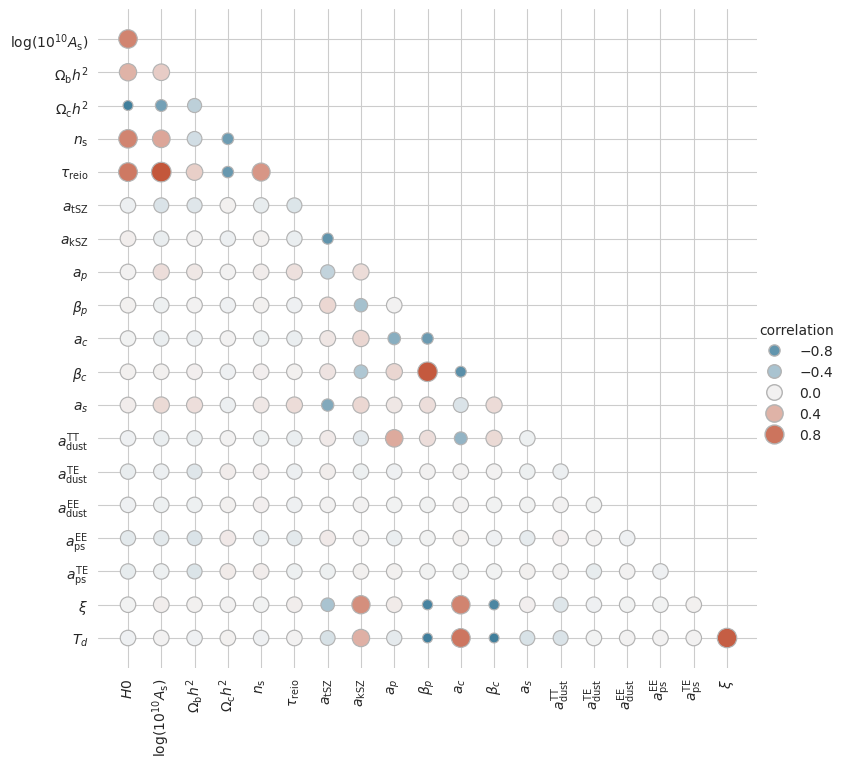

In [7]:
fisher.plot_fisher_matrix();

It tells you about the correlation of different cosmological parameters

Below are precision of the parameters

In [8]:
summary[0]

,value,$\sigma$,S/N,param
$H0$,67.36000,0.428518,157.192938,H0
$\log(10^{10} A_\mathrm{s})$,3.04400,0.018541,164.174742,logA
$\Omega_\mathrm{b}h^2$,0.02237,0.000063,354.441338,ombh2
$\Omega_\mathrm{c}h^2$,0.12000,0.001103,108.802933,omch2
$n_\mathrm{s}$,0.96490,0.003190,302.497772,ns
$\tau_\mathrm{reio}$,0.05440,0.010452,5.204523,tau
$a_\mathrm{tSZ}$,3.30000,0.069042,47.797292,a_tSZ
$a_\mathrm{kSZ}$,1.60000,0.156323,10.235230,a_kSZ
$a_p$,6.90000,0.049758,138.671830,a_p
$\beta_p$,2.08000,0.101970,20.398083,beta_p


## Let's plot the Fisher matrix

In [9]:
# Get covariance matrix from correlation matrix
std = summary[0].to_numpy()[:,1]
corr = summary[1].to_numpy()
cov =  np.multiply(corr,np.outer(std,std)).astype(float)
mean = summary[0].to_numpy()[:,0].astype(float)
par = summary[0].to_numpy()[:,3].astype(str)
label = [i.strip('$') for i in summary[0].index.to_list()]

In [10]:
from normal_corner import normal_corner
#%pip install normal_corner

In [11]:
# fig = normal_corner.normal_corner(cov,mean,label.tolist())

In [12]:
from getdist.gaussian_mixtures import GaussianND
from getdist import plots

In [13]:
samp_so = GaussianND(mean, cov, labels = label, names = par)

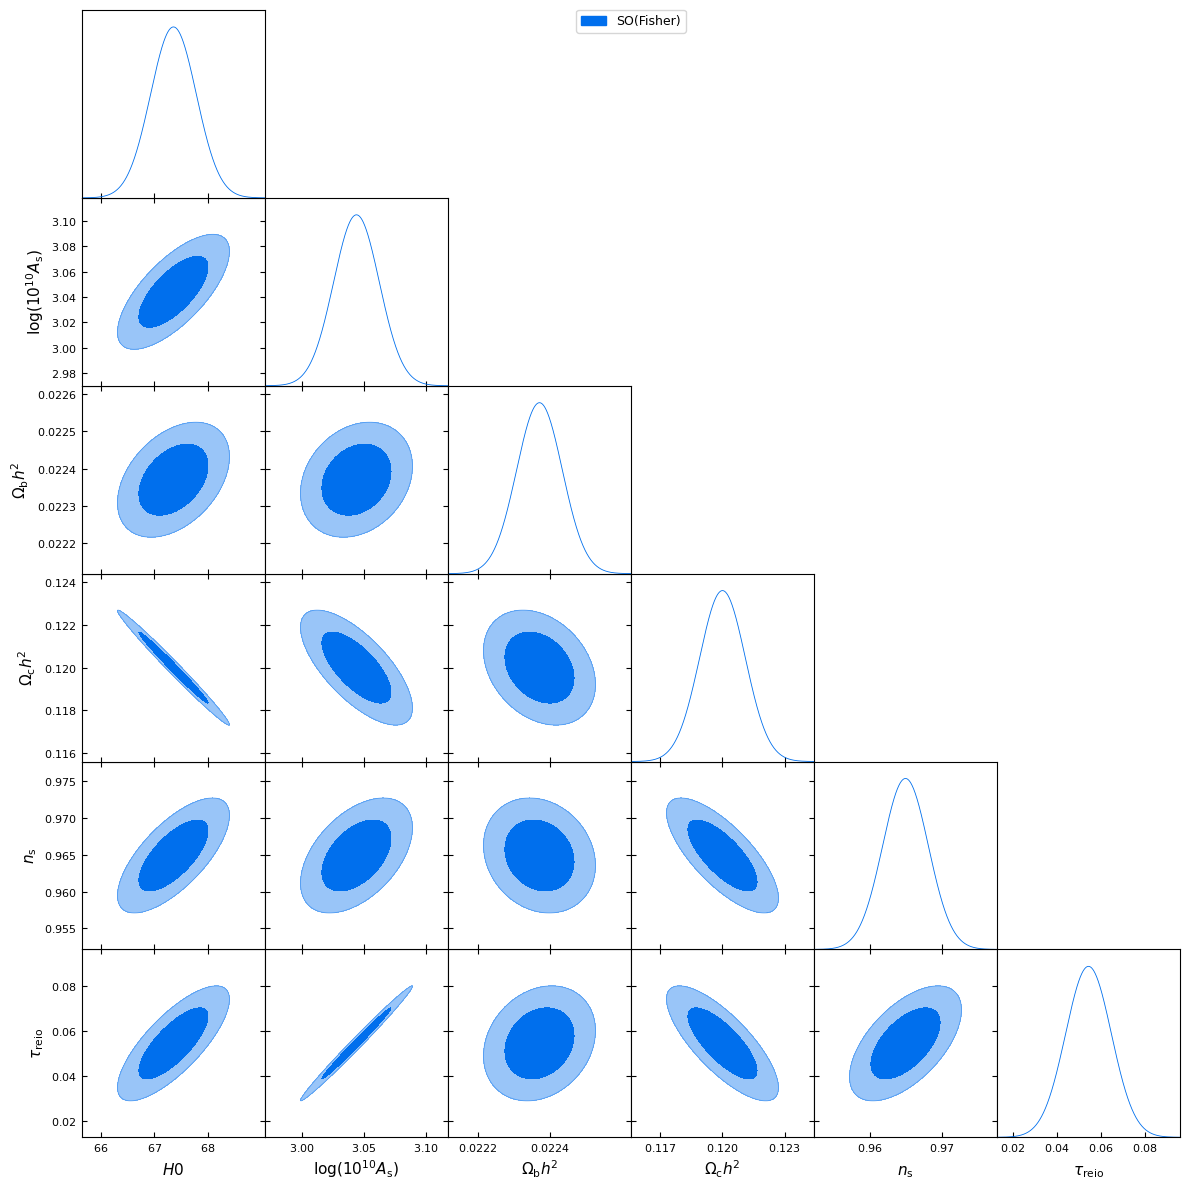

In [14]:
g = plots.get_subplot_plotter()
g.triangle_plot(samp_so, par[:6],filled=True,legend_labels = ['SO(Fisher)'])

### Running actual SO Likelihood w/ cobaya

In [15]:
from cobaya.run import run
from cobaya.yaml import yaml_load_file
import cobaya
from cobaya.install import install

In [16]:
mflike_yaml = yaml_load_file("mflike_example.yaml")

In [17]:
updated_info, sampler = run(mflike_yaml,resume = True)

[output] Creating output folder 'chains'
[output] Output to be read-from/written-into folder 'chains', with prefix 'mcmc_so'
[input] 'mflike.MFLike' could not be found as internal, trying external.
[camb] Attempting import of Cobaya-installed version, but defaulting to global import if not found.
[camb] No (compiled) installation of 'camb' at /private/var/folders/86/jk88n3gs4hs36g1wz1c_92n10t6912/T/cobaya_utilities/code/CAMB: Could not find compiled CAMB library camblib.so in /private/var/folders/86/jk88n3gs4hs36g1wz1c_92n10t6912/T/cobaya_utilities/code/CAMB.
[camb] Defaulting to global import.
[camb] `camb` module loaded successfully from /Users/sg58477/work/cosmodir/code/CAMB/camb
[likelihoodcollection] 'mflike.MFLike' could not be found as internal, trying external.
[mflike.mflike] LAT_93_s0 LAT_93_s0 cl_00 (147,) 30 9000
[mflike.mflike] LAT_93_s0 LAT_93_s2 cl_0e (147,) 30 9000
[mflike.mflike] LAT_93_s2 LAT_93_s2 cl_ee (147,) 30 9000
[mflike.mflike] LAT_93_s0 LAT_145_s0 cl_00 (147,)

KeyboardInterrupt: 

#### This will take a bit of time (~ hours) to give something meaningful. We are going to provide you with the chains with which you can perform analysis.